<a href="https://colab.research.google.com/github/Sam-Law1/Portfolia-updated/blob/main/SamanthaLawPORTFOLIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PORTFOLIO**
## Task 1
1.1. Download one year of hourly data for one location for the Pacific Sea Level Monitoring Project (http://www.bom.gov.au/oceanography/projects/spslcmp/data/index.shtml) and load these data into a platform such as Google Colaboratory. Briefly describe the source of these data (instruments, procedure, purpose etc) and display/describe the data graphically with one quality figure.


*Data chosen for Vanuatu 2017*

In [ ]:
#set up into drive 
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'

Mounted at /content/drive
Mounted at /gdrive
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [18]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt


#Wavelets
import pywt

# plot figures in Colaboratory notebook
%matplotlib inline

In [3]:
# Define the URL where the data set is stored 
TableA1_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/Vanuatu_Hourly_data_IDO70009_2017.csv'       #From Github 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
TableA1 = pd.read_csv(TableA1_url)

# Showing the data as a table 
pd.set_option('display.max_rows', 100) # This is to show more than a few rows
display(TableA1) 

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed
0,1/01/2017 0:00,1.007,28.0,27.5,1006.5,0.019,-0.043,335,4.9,1.8
1,1/01/2017 1:00,0.880,28.0,28.0,1006.0,0.029,-0.038,302,6.3,1.9
2,1/01/2017 2:00,0.799,28.0,28.2,1005.7,0.035,-0.038,296,6.5,2.0
3,1/01/2017 3:00,0.787,28.1,27.0,1005.3,0.031,-0.044,296,5.2,1.0
4,1/01/2017 4:00,0.864,28.1,26.9,1005.0,0.028,-0.051,72,4.0,1.4
...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2017 19:00,1.324,28.1,23.6,1009.3,0.014,-0.032,179,1.2,0.3
8756,31/12/2017 20:00,1.183,28.1,26.9,1010.1,0.013,-0.025,141,1.4,0.2
8757,31/12/2017 21:00,0.997,28.1,28.0,1010.6,0.024,-0.007,73,4.9,2.8
8758,31/12/2017 22:00,0.827,28.4,28.5,1010.6,0.040,0.014,73,6.5,4.1


**1.1 - Description of the data**

Vanuatu - 2017 - Station number( BoM=200857 ATT=5732 WMO=91559 )

By looking at the Metadata for the tidal data exchange we can see that the data is being recorded by a data logger (Sutron 9000). It includes an acoustic in air sensor ( the Aquatrak Transducer) which is reading every 1 minute, 6 minutes and hourly. The sensor has an estimated precision of the water level checks within +-1mm and the Doodson's method is used for tidal predictions within the Tipp4 software program. 

The purpose of these measurements is to generate an accurate record of variance in the long-term sea level for the Pacific region. It is providing information about the processes, scale and implications of sea-level rise and variability of extreme events on South Pacific communities.  

For the purpose of this portfolio I am looking at the sea level data plus also a quick analysis of air and water temperature data as well. 

Text(0.5, 0, 'Time (hours)')

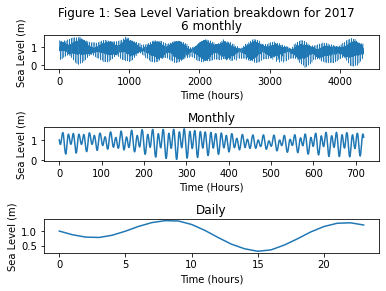

In [4]:
#plotting figure to show the data for the sea level at Vanuatu for 2017
#note: full yearly data not shown as too many data points for a clean figure
plt.suptitle('Figure 1: Sea Level Variation breakdown for 2017')
plt.subplot(12,1,(1,2))
plt.title('6 monthly')
TableA1['Sea Level'].iloc[0:24*181].plot(linewidth = 0.5) #6 monthly variation
plt.ylabel('Sea Level (m)')
plt.xlabel('Time (hours)')
plt.subplot(12,1,(6,7))
plt.title('Monthly')
TableA1['Sea Level'].iloc[0:24*30].plot()  # monthly variation
plt.ylabel('Sea Level (m)')
plt.xlabel('Time (Hours)')
plt.subplot(12,1,(11,12))
plt.title('Daily')
TableA1['Sea Level'].iloc[0:(24)].plot()  # daily variation 
plt.ylabel('Sea Level (m)')
plt.xlabel('Time (hours)')

From the above figure we can deduce that there is a semi-diurnal tide influencing the sea level at this location. Also there is the influence of the spring-neap tidal cycle at the monthly scale. Further analysis needs to be conducted to show if there is any overall change in sea level over the entire year by removing these tidal influences.

The water and air temperature data was analysed visually and it was found that  both data sets had some anomolies. After running through the air and water temp date it was found that 146 hours of water temp data and 29 hours of air temp data was errored at the value of -9999. These values were then made 0 for a better analysis. 

In [25]:
#renaming the columns for ease of use
# create a dictionary, key = old name, value = new name
dict = {'Water Temperature': 'watertemp',
        'Air Temperature': 'airtemp',
        'Sea Level': 'sealevel',
        'Wind Gust' : 'windgust'}

TableA1.rename(columns=dict,
          inplace=True)

**1.2 - Investigations**

Because we know the physical considerations of the air temp data ( i.e. daily and seasonal cycles) we can express them as a sum of a few sinusoids of known frequency. We use the least square procedure to find the amplitude and phase of each known sinusoid. 

1. Using least Squares method on air temperature data

We are using the below formula and using matrix form to determine the appropriate coefficients and plot these. 

$$ A_k \cos\left(\frac{2\pi j k}{n}\right) + B_k \sin\left(\frac{2\pi j k}{n}\right) $$

where $k$ is the order of the harmonic (between 1 and $n$/2) and $n$ is the number of data points in the time series (assuming constant spaceing of data)

The air temperature data is known to have an annual cycle and therefore we have $k = 1$. The below is finding the coefficients and plottong the curve to show the fit for the first month of data. 

[1.756002366862458, 1.1900522228737662]


Text(0.5, 1.0, 'Fitting a single harmonic on the Air Temperature data for Vanuatu 2017')

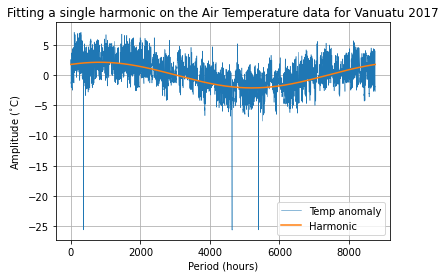

In [6]:
#We need to set up the harmonics
k=1                                                                          #number of years (note: we can change this to 365 and it also works for daily)
i=np.arange(0,TableA1.airtemp.size)                                           #the size of the data points we have
n=i.shape[0]
cosfnc = np.cos(2*np.pi*i*k/n)                                                #setting up cos and sin 
sinfnc = np.sin(2*np.pi*i*k/n)

y = TableA1.airtemp-TableA1.airtemp.mean()                                    #we are looking at the temperature anomalies therefore we need to minus the mean from the temp

def fourtrans(y,k):                                                           # y = data, k = harmonic
  n = y.shape[0]
  A_k=(2/n)*np.sum(y.values*np.cos(2*np.pi*k*np.arange(0,n)/n))               #np.arange gives range between values given
  B_k=(2/n)*np.sum(y.values*np.sin(2*np.pi*k*np.arange(0,n)/n))
  return (A_k, B_k)
[A,B] = fourtrans(y,k) 
print([A,B])

harmonic = A*cosfnc + B*sinfnc                                               #plot the least square method versus the temp anomolies to determine if well fitted. 
plt.plot(i,TableA1.airtemp-TableA1.airtemp.mean(),label ='Temp anomaly', linewidth = 0.5)     #added labels 
plt.plot(i,harmonic, label = 'Harmonic')
plt.grid()
plt.xlabel('Period (hours)')
plt.ylabel('Amplitude ($^{\circ}$C)')
plt.legend(loc='best')
plt.title('Fitting a single harmonic on the Air Temperature data for Vanuatu 2017')
#plt.xlim([0,24])                                                            #if you change k=365 then add this limit to show how the curve fits

The above figure shows the three days of errors with the large drops in values. It also shows that the air temp does in fact follow the annual seasonal cycle. By changing the k value to 365 and adding the limit on the x axis you can see the daily cycle too. 

2. Using Fast Fourier Transform on water temperature data

Another case of data is the water temp in which we can deduce like the air temperature however for the case of this analysis we are going to use fast fourier transform to show how the energy is distributed among a range of frequencies.

The way that the fast fourier transfrom works is by using a package called numpy, this is inbuilt in Python. It computes a complex coefficient ($H_k$) using

$$ H_k = \sum_{i=1}^{n}y_n\exp^{-i\left(\frac{2\pi i k}{n}\right)}$$.

Text(0.5, 0, 'Frequency (1/hours)')

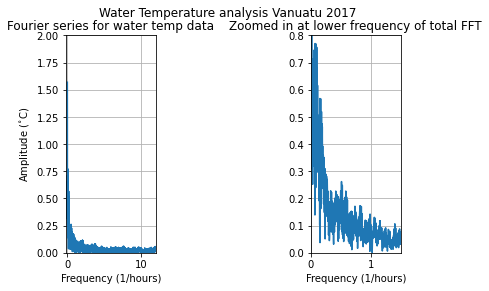

In [7]:
n = TableA1.shape[0]                                                            #show shape of data again
sp = np.fft.rfft(TableA1['watertemp'],n)/(n/2)                                   # fast fourier transform times by real fast fourier transform
plt.suptitle('Water Temperature analysis Vanuatu 2017')
plt.subplot(1,7,(1,2))                                                           #set up sub plots to be seen clearly
plt.title('Fourier series for water temp data')
plt.plot(np.arange(1,int(n/2))/(n/24),abs(sp[1:int(n/2)]))                      # looking at the absolute value of the amplitude to show real values only( not complex)
plt.grid()
plt.axis([-0.2, 12, 0, 2])
plt.xlabel('Frequency (1/hours)')
plt.ylabel('Amplitude ($^{\circ}$C)') 

plt.subplot(1,7,(6,7))
plt.title('Zoomed in at lower frequency of total FFT')
plt.plot(np.arange(1,int(n/2))/(n/24),abs(sp[1:int(n/2)]))
plt.grid()
plt.axis([0,1.5,0,0.8])
plt.xlabel('Frequency (1/hours)')

From the above graphs we can see the seasonal, diurnal, transient and noise components of the water temperature data. We can deduce that the seasonal components is between the frequencies 0 to 0.05, the diurnal is between 0.95 and 1.05, the transient is the remainder of the frequencies. This also shows that the transient influence has small amplitudes and therefore not as much infleunce compared to the seasonal influence. 

We can also compare this to the air temperature breakdown and see the frequency differences and deduce that the ocean acts as a heat buffer and does not follow the same pattern as the air temperature.

We can see small potential for aliasing in the water temperature analysis using the fft above as the Nyquist frequency is one half of the sampling rate which is hourly , therefore it is half an hour or in other words 0.000555Hz. Therefore the values shown close the y axis are potentially inpacted by an aliased signal. 

3. Using Periodogram on Sea Level data

Compute the periodogram of the sea level data. 
 

Text(0, 0.5, 'Amplitude (m)')

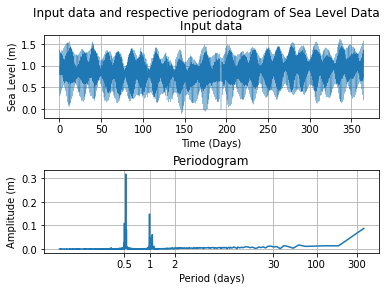

In [13]:
dt = 0.041667                                                                  # 1 hour/24 hours
t0 = 0
n3 = TableA1.shape[0]
time = t0+np.arange(0,n3)*dt
plt.suptitle('Input data and respective periodogram of Sea Level Data')          
plt.subplot(5,1,(1,2))
plt.title('Input data')                                                         #plot initial data to show comparison against the periodogram
plt.plot(time,TableA1.sealevel.values, linewidth = 0.25 )
plt.grid()
plt.ylabel('Sea Level (m)')
plt.xlabel('Time (Days)')
plt.subplot(5,1,(4,5))
plt.title('Periodogram')
sp1 = np.fft.rfft(TableA1.sealevel.values,n3)/(n3/2)                            #calculation of periodogram
fft_freq = np.arange(1,int(n3/2))/(n3*dt)
plt.plot(np.log2(1/fft_freq),abs(sp1[1:int(n3/2)]))                             #plotted log base 2 of the 1/ frequency ( period) versus the absolute value 
yticks = [0.5,1,2,30,100,300];                                                 #chosen randomly 
plt.grid()
plt.xticks(ticks = np.log2(yticks), labels = yticks)
plt.xlabel('Period (days)')
plt.ylabel('Amplitude (m)')

From the above periodogram we can see the variations at 0.5 days and 1 day which are due to the semi-diurnal tides. We can also see an increase at the 30 day mark which is half the time it takes the moon to orbit the Earth, this is also known as the neap and spring tides. We also an increase at 300 hours mark which could be attiributed to the late cyclone season which happens between November to April of each year. 

Lastly we will use wavelet analysis to investigate the sea surface temp further ( this code is still being tweaked). 

/usr/local/lib/python3.7/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


Text(0.5, 0, 'Time (days)')

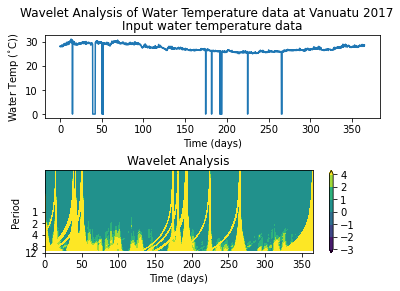

In [36]:
dt = 0.041667                                                                    #1 hour/24 hours
time = 0+np.arange(0,TableA1.watertemp.shape[0])*dt
waveletname = 'cmor'                                                             # We will use the Complex Morelet Wavelet
scales = np.arange(1,128)                                                       #set the scale to filter the lowest level of the transofmr and ensure the whole spectrum is covered
data = TableA1.watertemp.values
[coef, freqs] = pywt.cwt(data,scales,waveletname,dt)
power = (abs(coef))**2
period = 1./freqs
plt.suptitle('Wavelet Analysis of Water Temperature data at Vanuatu 2017')
plt.subplot(5,1,(1,2))
plt.title('Input water temperature data')
plt.plot(time,data)
plt.ylabel('Water Temp ($^{\circ}$C))')
plt.xlabel('Time (days)')
levels = [ 0.125,0.25, 0.5, 1, 2, 4, 16]
contourlevels = np.log2(levels)
plt.subplot(5,1,(4,5))
plt.title('Wavelet Analysis')
plt.contourf(time,np.log2(period),(power), contourlevels, extend='both');
yticks = [1,2,4,8,12];
plt.gca().invert_yaxis()
plt.yticks(ticks = np.log2(yticks), labels = yticks)
plt.colorbar()
plt.ylabel('Period')
plt.xlabel('Time (days)')

We see from the intial input data that there are spikes where the data is 0, this shows the error in the data. By using wavelet power spectrum analysis we can see that these errors are impacting the analysis. And will need to be taken out to understand clearly what is being shown here. (NOTE: this will be done in the final submission if possible, still figuring out how to take these errors out of the dataset without removing full rows of data from the overall dataset). 

From what we can gather though, the x axis is the wavelet location in time and the y axis is the wavelet period. The yellow areas show the higher power (some errors as mentioned above) however you can also see that during the early part of the year and the end of the year the water temp was more active which could be due to the cyclone season. 

**1.3 - Conclusion**

From all of the above outputs we can see varied influences on the different data sets. For air and water teamperature data there is a larger seasonal influence during the year and a small daily influence. Because we are using just one year of data we can not see the influence of El Nino in this analysis. 
Likewise the sea level data has impacts of the tidal systems and large wave events which happen once a year. 





